**ADS-500B Data Science Programming**

**Final Team Project**

**Authors: Lorena Dorado and Tysir Shehadey**

## Housing Price Prediction
Predicting housing prices and understanding human behavior are essential for advising clients to a successful home buying journey. There are many attributes that are correlated to sale price.

The goal of thie project is to produce data-backed predictions on housing prices for our clients. The team performs exploratory data analysis to understanded the housing features that affect price using python.

The dataset used for this analysis contains details of house sales of King County in Washington State. The data represents houses sold between May 2014 and May 2015. With supervised learning, we can predict home prices based on prior records.

## **1. Data Preparation**

Import python libraries to enable analysis, visualization, and machine learning.

In [1]:
# import  standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import numpy as np
import os

# libraries for plotting
import seaborn as sns
sns.set(style='darkgrid',palette="deep")

# libraries for linear regression modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# libraries for statistical analysis
import statsmodels.api as sm
from statsmodels.api import OLS

#### **1.1 Import Dataset**
The raw data from Kaggle is imported and prepared for regression modeling.

In [2]:
# create a pandas dataframe from csv
housing_data = pd.read_csv('house_sales.csv', header=0, sep=',')
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### **1.2 Clean, wrangle, and handle missing data**

Identify which columns have missing values and determine best method to impute.

In [3]:
# identifying missing values in the 4 columns
housing_data.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### **1.3 Transform data appropriately using aggregation functions**

Impute missing numerical variables with measures of centrality.

In [4]:
impute_columns = ['bedrooms', 'bathrooms','sqft_living', 'sqft_lot']
housing_data[impute_columns].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot
count,20479.000000,20545.000000,20503.000000,2.056900e+04
mean,3.372821,2.113507,2081.073697,1.517982e+04
std,0.930711,0.768913,915.043176,4.148617e+04
min,0.000000,0.000000,290.000000,5.200000e+02
25%,3.000000,1.500000,1430.000000,5.040000e+03
50%,3.000000,2.250000,1920.000000,7.620000e+03
75%,4.000000,2.500000,2550.000000,1.070800e+04
max,33.000000,8.000000,12050.000000,1.651359e+06


In [5]:
# identify outliers
br_outliers = housing_data[(housing_data['bedrooms'] > 30)]
br_outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33.0,1.75,1620.0,6000.0,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [6]:
# replace null values of `bedrooms` with the mean of the `bedrooms` column
mean_bed=housing_data['bedrooms'].mean()
housing_data['bedrooms'].replace(np.nan,mean_bed, inplace=True)

# replace null values of `bathrooms` with the mean of the `bathrooms` column
mean_bath=housing_data['bathrooms'].mean()
housing_data['bathrooms'].replace(np.nan,mean_bath, inplace=True)

# replace null values of `sqft_living` with the values of `sqft_living15` column
housing_data['sqft_living'].fillna(housing_data['sqft_living15'], inplace=True)

# replace null values of `sqft_lot` with the values of `sqft_lot15` column
housing_data['sqft_lot'].fillna(housing_data['sqft_lot15'], inplace=True)

# identifying missing values remaining
housing_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### **1.4 Reduce redundant data and perform need-based discretization**

After determining possible correlation, exclude redundant data and determine which variables are relevant to modeling.

In [7]:
# drop columns that don't add value to analysis
housing_data.drop(["id", "sqft_living15","sqft_lot15", "lat", "long"], axis = 1, inplace = True)

# drop outliers influencing analysis
housing_data.drop(15870, inplace=True)

## **2. Data Analysis and Visualization**

#### **2.1 Identify categorical, ordinal, and numerical variables within the data**

The variables `waterfront` and `view` are **categorical binary**; `condition` is **categorical ordinal**; and the remaining variables are **numerical**. In this context, `grade` is analyzed as a numerical value.

In [8]:
# remove string from date column
housing_data['date'] = housing_data['date'].str.replace('T000000', '', regex=True)
# convert date column to datetime type
housing_data['date'] = pd.to_datetime(housing_data['date'])

# identify and convert data types
housing_data['waterfront'] = housing_data['waterfront'].astype('category')
housing_data['view'] = housing_data['view'].astype('category')
housing_data['condition'] = housing_data['condition'].astype('category')

# discrete data is converted to integer
housing_data['bedrooms'] = housing_data['bedrooms'].astype('int64')
housing_data['bathrooms'] = housing_data['bathrooms'].astype('int64')
housing_data['floors'] = housing_data['floors'].astype('int64')
print(housing_data.dtypes)

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living             float64
sqft_lot                float64
floors                    int64
waterfront             category
view                   category
condition              category
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
dtype: object


#### **2.2 Provide measures of centrality and distribution with visualizations**

In [9]:
housing_data.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
count,21612,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,2014-10-29 04:46:26.451971328,5.400835e+05,3.351888,1.760827,2075.502637,1.499538e+04,1.446234,7.656904,1788.425319,291.495697,1971.006247,84.406163,98077.938645
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000
25%,2014-07-22 00:00:00,3.218375e+05,3.000000,1.000000,1430.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.000000,1910.000000,7.616000e+03,1.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.000000,2540.000000,1.062500e+04,2.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000
max,2015-05-27 00:00:00,7.700000e+06,10.000000,8.000000,12050.000000,1.651359e+06,3.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000
std,NaN,3.671351e+05,0.887157,0.717282,904.911843,4.075606e+04,0.551898,1.175477,828.094487,442.580931,29.373636,401.688123,53.505993


Distribution of numerical data

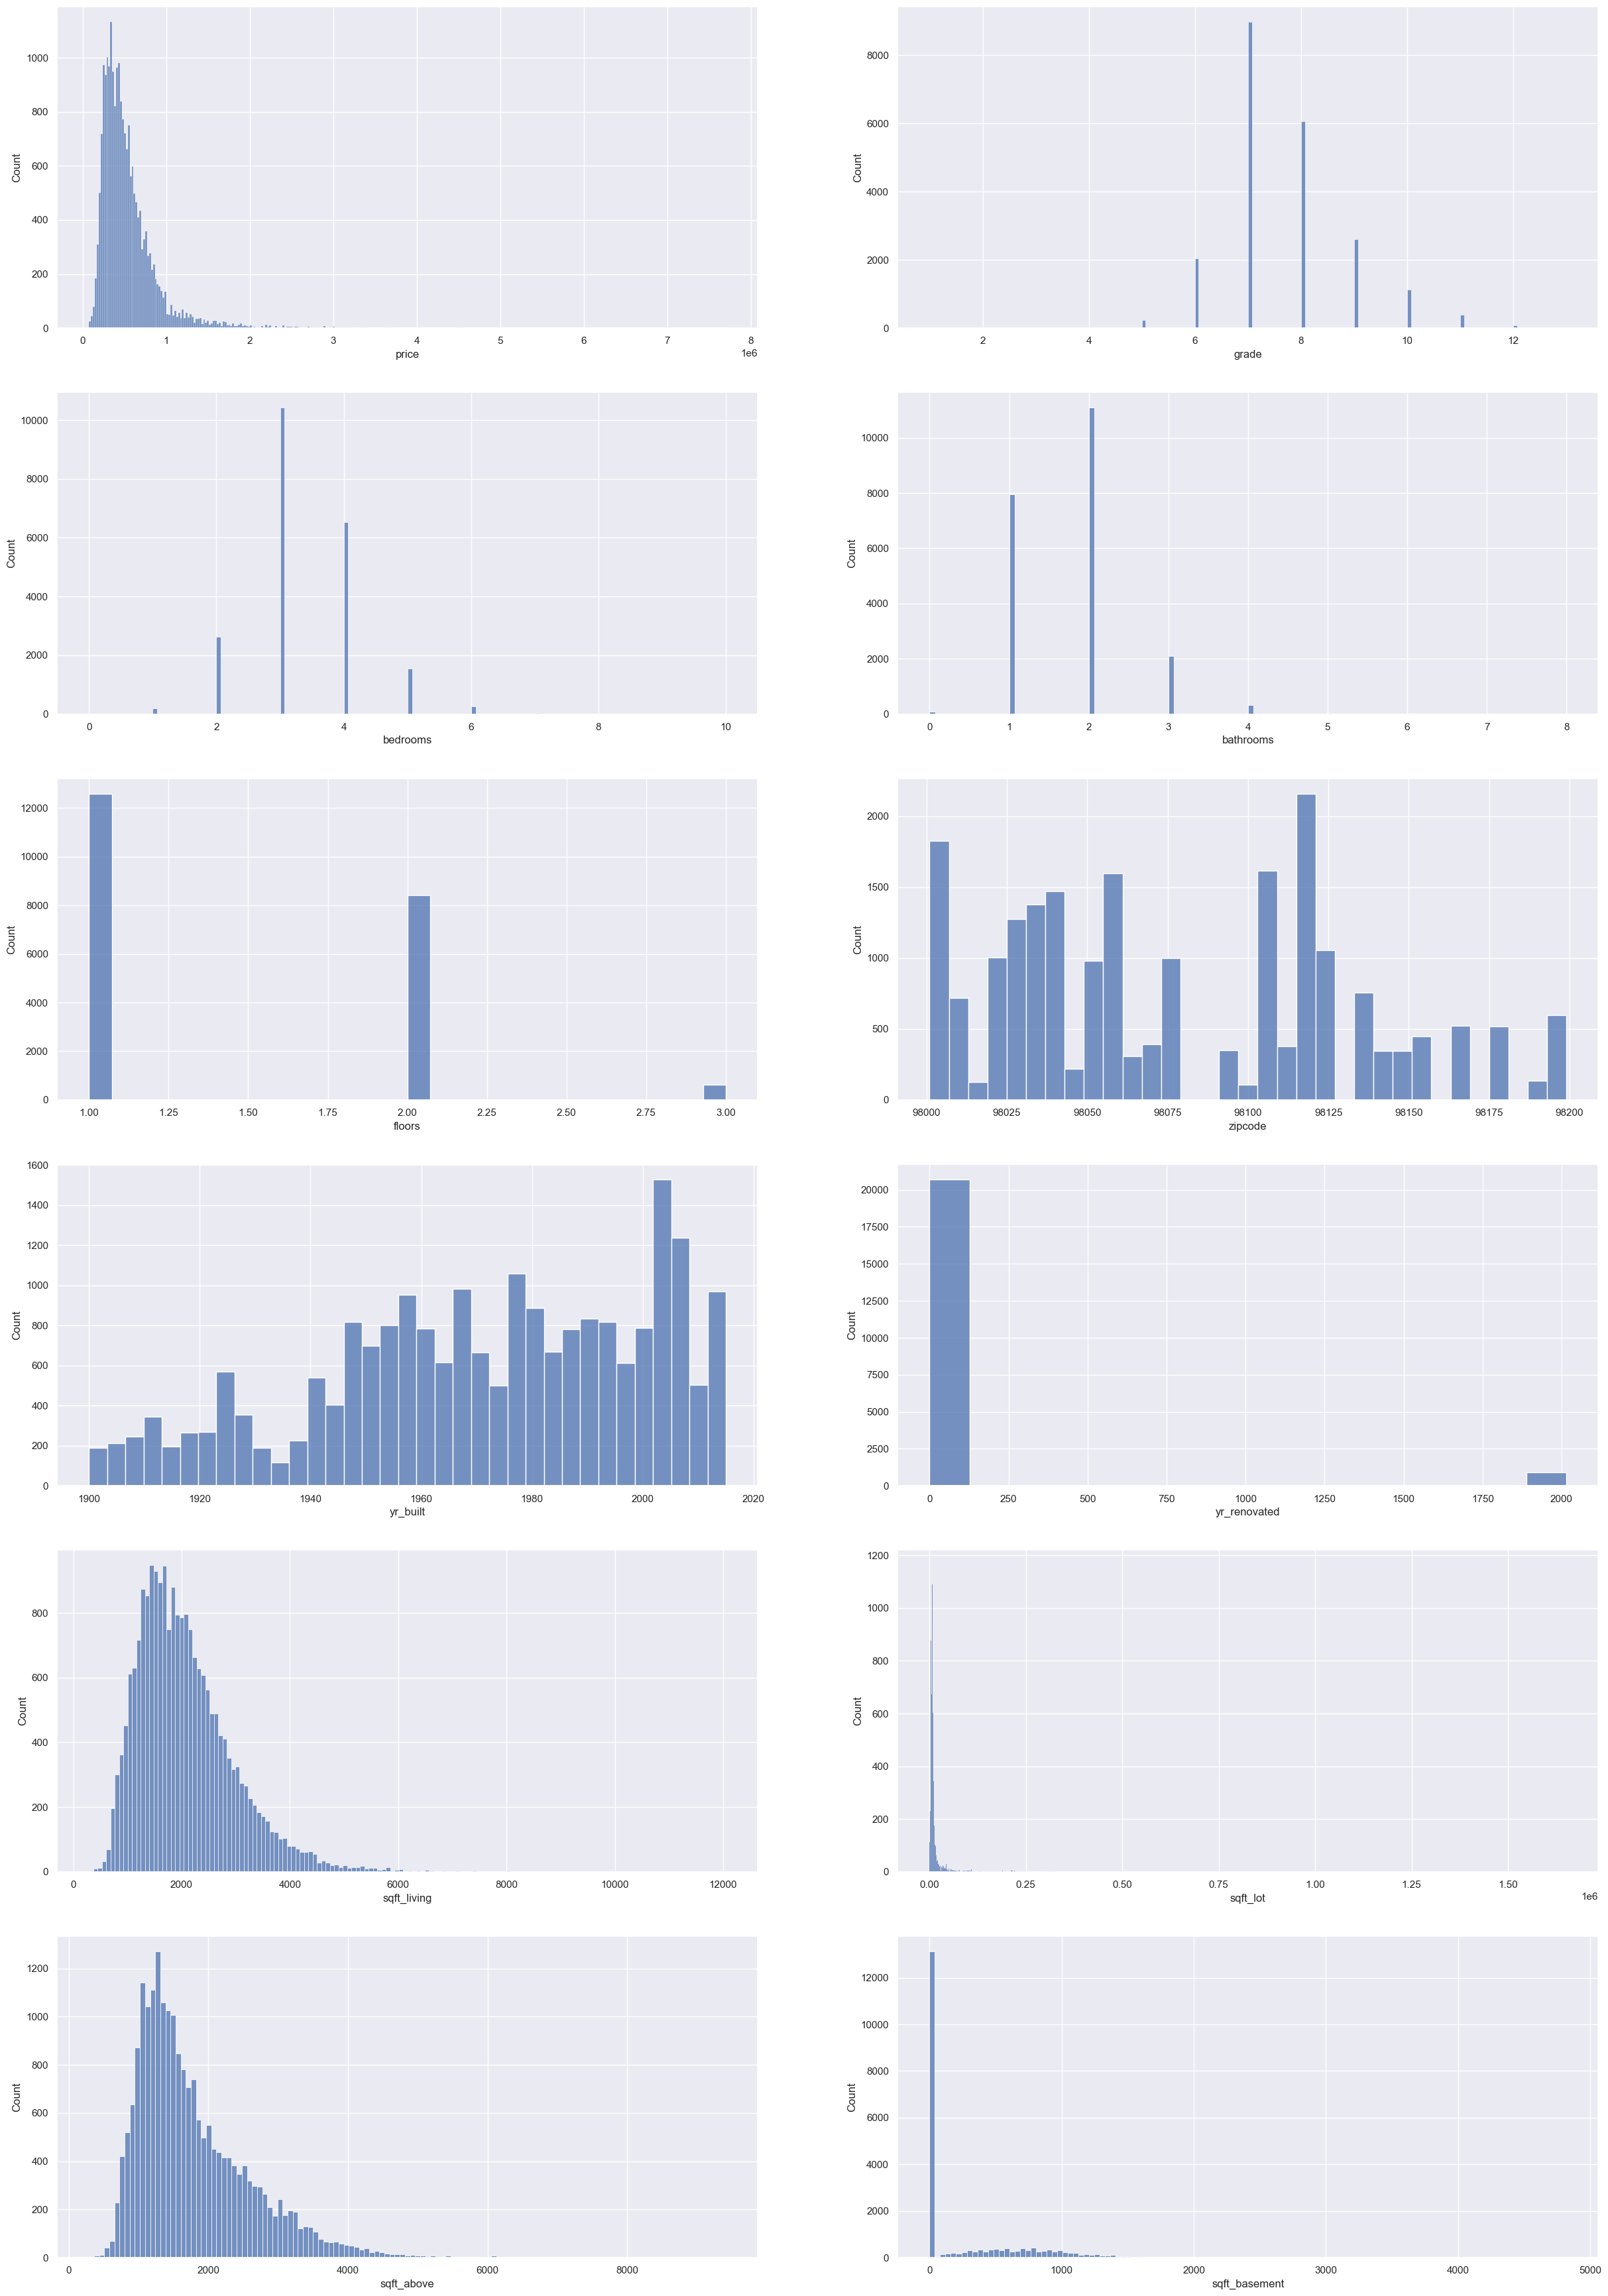

In [10]:
# Create subset for numerical data
numericals = ['price', 'grade', 
            'bedrooms', 'bathrooms', 
            'floors', 'zipcode', 
            'yr_built', 'yr_renovated',
            'sqft_living', 'sqft_lot',
            'sqft_above', 'sqft_basement']

# plot numerical variables
h = plt.figure(figsize=(30,150))
c = 0
for i in numericals:    
    h.add_subplot(20, 2, c+1)
    sns.histplot(housing_data[numericals][i])
    c=c+1
plt.show()

#### **2.3 Diagnose for correlations between variables and determine independent and dependent variables**

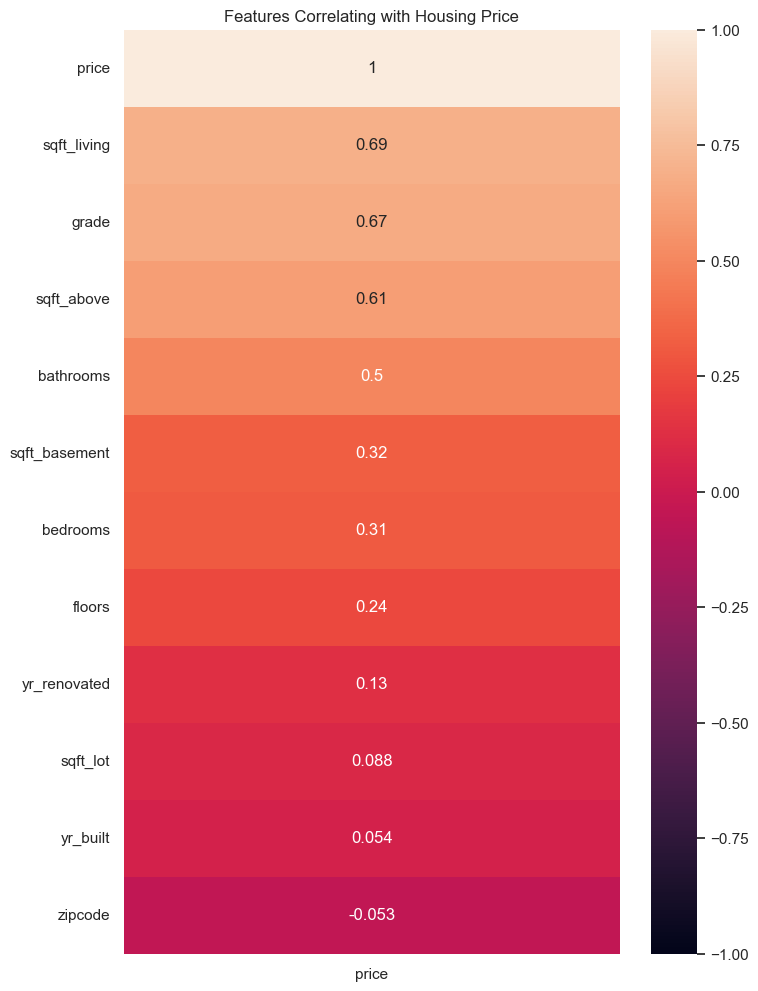

In [11]:
# numeric only
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(
    housing_data.corr(numeric_only=True)[['price']].sort_values(
        by='price', ascending=False),
    vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Housing Price');

Features with moderate correlation: `sqft_living`, `grade`, `sqft_above`, `bathrooms`. 

<Axes: >

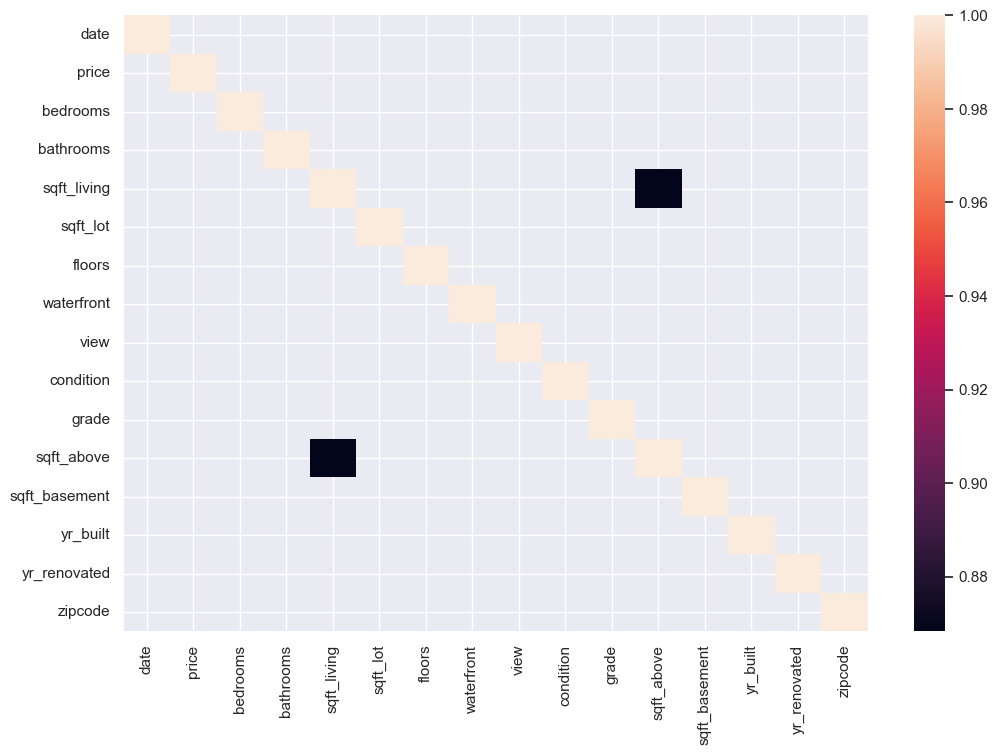

In [12]:
# Identifying high correlations of possible multicollinearity
corr = housing_data.corr()
high_corr = corr[corr>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(high_corr)

However, `sqft_above` will be removed for the final model as it may have multicollinearity concerns with `sqft_living`.

In [13]:
# drop columns with multicollinearity concerns
housing_data.drop(["sqft_above"], axis = 1, inplace = True)

#### **2.4 Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest**

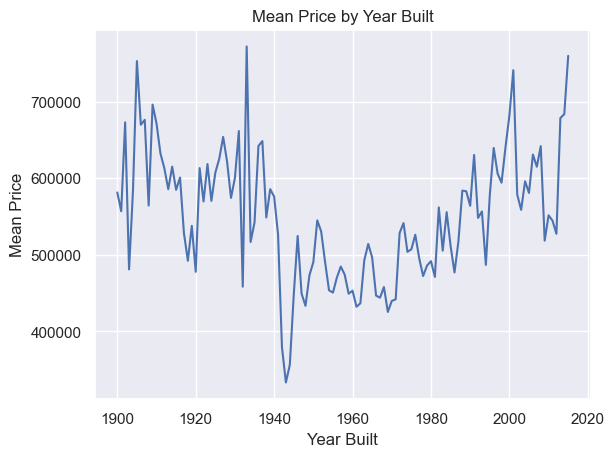

In [14]:
#aggregated the price of houses by the year that they were built
#can provide insight into trends in housing prices based on year built
aggregate = housing_data.groupby('yr_built').agg({'price': 'mean'}).reset_index()
aggregate['price'] = aggregate['price'].round(2)

#checking for trends in the average price of homes based on the year they were built
plt.plot(aggregate['yr_built'], aggregate['price'])
plt.title('Mean Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

**<u>Result</u>:** This graph shows the average price of a home based on the year that the home was built. An important piece of information regarding this graph is that homes can be built in 1900 but undergo renovations over the years and look modern. This is why some of the highest priced housing is from the early 1900s and 1930s. An interesting point on this graph is the price of houses built in the 1940s era. There are many things that can impact this extreme downfall in pricing but it is likely due to WWII. It is assumed the houses from this time were not built well and maybe even turns away newer generations from wanting to renovate them.

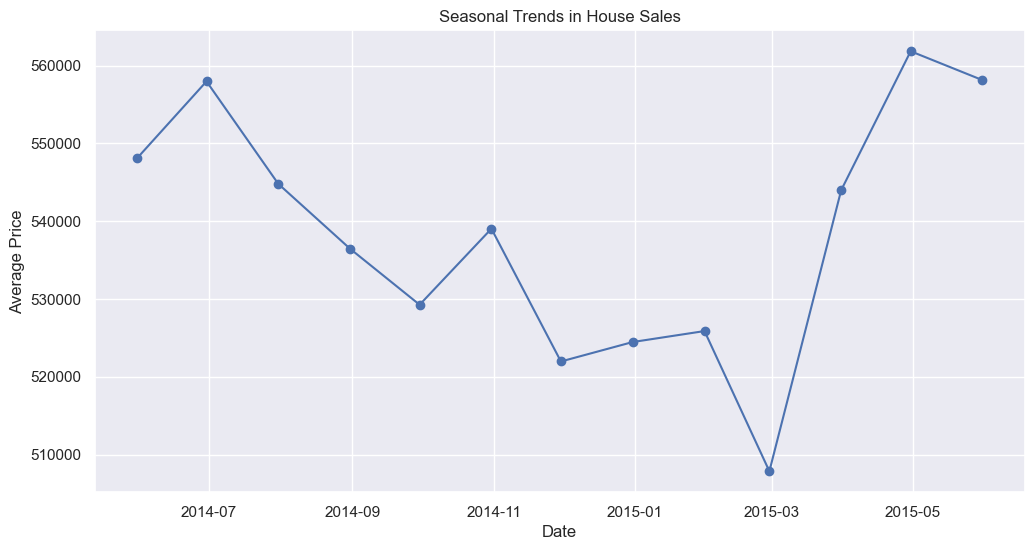

In [15]:
housesales_df = housing_data

# group the dataset by date
housesales_df['date'] = pd.to_datetime(housesales_df['date'])

# the mean of the groups is calculated
monthly_trends = housesales_df.groupby(pd.Grouper(key='date', freq='M'))['price'].mean()

# create plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends.index, monthly_trends, marker='o', linestyle='-')
plt.title('Seasonal Trends in House Sales')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**<u>Result</u>:** This graph displays seasonal trends for housing sales based on the average price of the homes sold for the month. This graph shows that the best month to buy homes is in March. Subsequently, the best 'season' to buy homes would be Winter. The three lowest points for the average price of homes sold here is December to March, indicating this to be the best time to purchase a home. More years of house sales data in this area would be beneficial to confirm this trend.

## **3. Data Analytics**

#### **3.1 Supervised Learning Using Linear Regression Model**

Features with moderate correlation: sqft_living, bathrooms,

In [16]:
# drop variables incompatible to modeling
housing_data.drop(["date"], axis = 1, inplace = True)

# drop categorical variables
housing_data.drop(["waterfront", "view","condition"], axis = 1, inplace = True)

# selecting independent variables to explore
x_all = housing_data.drop(columns=['price'])

# fit a linear regression model to predict 'price' with housing features
Y = housing_data['price'] # response variable

In [17]:
# explore all numerical variables for relationships
lm1 = sm.add_constant(x_all)

# fit linear regression
lm1_results = OLS(Y,lm1).fit()

# view ordinary least squares results
lm1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     3437.
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:42:16   Log-Likelihood:            -2.9730e+05
No. Observations:               21612   AIC:                         5.946e+05
Df Residuals:                   21601   BIC:                         5.947e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           7.48e+06    3.2e+06      2.334      0.020     1.2e+06    1.38e+07
bedrooms      -4.423e+04   2192.401    -20.176      0.000   -4.85e+04   -3.99e+04
bathrooms      5.991e+04   3210.587     18.661      0.000    5.36e+04    6.62e+04
sqft_living     168.3437      3.558     47.318      0.000     161.370     175.317
sqft_lot         -0.1813      0.039     -4.617      0.000      -0.258      -0.104
floors         2.768e+04   4065.270      6.810      0.000    1.97e+04    3.57e+04
grade          1.372e+05   2243.196     61.150      0.000    1.33e+05    1.42e+05
sqft_basement    36.1968      4.515      8.017      0.000      27.347      45.047
yr_built      -4009.4940     74.877    -53.548      0.000   -4156.258   -3862.730
yr_renovated     16.7913      4.057      4.139      0.000       8.840      24.743
zipcode          -4.5202     32.166     -0.141      0.888     -67.568      58.527
==============================================================================
Omnibus:                    18070.191   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1577890.003
Skew:                           3.517   Prob(JB):                         0.00
Kurtosis:                      44.264   Cond. No.                     2.05e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**<u>Result</u>:** After reviewing the initial regression results including all numerical variables, the t statistic for `sqft_living`, `grade`, `bathrooms`, `bedrooms`, and `yr_built` are high with low p-value, indicating the significance of the two predictor variables. Therefore the five independent variables will be used to predict housing price.

In [18]:
# housing features for predictor variables
X = housing_data[['sqft_living', 'grade', 'bathrooms', 'bedrooms', 'yr_built']]

In [19]:
# explore selected independent variables
exlm1 = sm.add_constant(X)
exlm1_results = OLS(Y,exlm1).fit()
exlm1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     6803.
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:42:16   Log-Likelihood:            -2.9737e+05
No. Observations:               21612   AIC:                         5.948e+05
Df Residuals:                   21606   BIC:                         5.948e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.056e+06   1.17e+05     60.517      0.000    6.83e+06    7.28e+06
sqft_living   175.7904      3.232     54.388      0.000     169.455     182.126
grade        1.375e+05   2195.155     62.660      0.000    1.33e+05    1.42e+05
bathrooms    6.827e+04   3101.929     22.008      0.000    6.22e+04    7.43e+04
bedrooms    -4.372e+04   2181.796    -20.040      0.000    -4.8e+04   -3.94e+04
yr_built    -4011.8616     61.452    -65.284      0.000   -4132.313   -3891.410
==============================================================================
Omnibus:                    17992.227   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1545745.203
Skew:                           3.498   Prob(JB):                         0.00
Kurtosis:                      43.836   Cond. No.                     2.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multiple Linear Regression on training sets

From the housing_data dataset, there are 21,612 records which will be split into 25% training set and 75% test set. The training set will be used to train the model and the test set will be used to evaluate the model performance.

In [20]:
# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# get the shape of train and test sets
train_shape = X_train.shape[0]
test_shape = X_test.shape[0]
X_shape = X.shape[0]

print('Number of Records: ', X_shape)
print('Train Size:', train_shape, '(',100*round(train_shape/X_shape, 2),'%)')
print('Test Size:', test_shape, '(',100*round(test_shape/X_shape, 2), '%)')

Number of Records:  21612
Train Size: 16209 ( 75.0 %)
Test Size: 5403 ( 25.0 %)


#### **3.2 Train, test, and provide accuracy and evaluation metrics for model results**
Linear Regression is the machine learning algorithim. Specify set (train or test) and specify which variables (x or y).

In [21]:
# function to calculate model evatuation
def evaluate_model(y_xtest, y_pred):

    # results dictionary
    results = {}

    # R-squared
    results['R2'] = r2_score(y_xtest, y_pred)

    # Mean Squared Error
    results['MSE'] = mean_squared_error(y_xtest, y_pred)

    # Root Mean Squared Error
    results['RMSE'] = np.sqrt(results['MSE'])

    # Mean Absolute Error
    results['MAE'] = mean_absolute_error(y_xtest, y_pred)

    # Mean Percentage Error
    mpe = np.mean((y_xtest - y_pred) / y_xtest) * 100
    results['MPE'] = mpe

    # Mean Absolute Percentage Error
    mape = np.mean(np.abs((y_xtest - y_pred) / y_xtest)) * 100
    results['MAPE'] = mape

    return results

In [22]:
# fit a linear regression model to predict 'price' with training dataset
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

# apply LR model to make prediction on training set
y_lm2_train_pred = lm2.predict(X_train)

# evaluate performance of LR algorithm
y_lm2_test_pred = lm2.predict(X_test)

Evaluate Linear Regression Model using metrics from sklearn library.

In [23]:
# evaluate the lm2 linear regression model
results_lm2 = evaluate_model(y_test, y_lm2_test_pred)

# calculate results
print("Multiple Linear Regression Model Results:")
for metric, value in results_lm2.items():
    print(f"{metric}: {value}")

Multiple Linear Regression Model Results:
R2: 0.6069076673908056
MSE: 61861527361.53754
RMSE: 248719.77678008948
MAE: 147206.5123640597
MPE: -7.760305233131836
MAPE: 29.7976464480787


In [24]:
# preview of the difference between actual and predicted
price_pred = pd.DataFrame({'Actual':y_test,'Predicted':y_lm2_test_pred, 'Difference':y_test-y_lm2_test_pred})
price_pred.head()

,Actual,Predicted,Difference
15543,210000.0,461343.981739,-251343.981739
19908,1260000.0,839747.596446,420252.403554
20187,462550.0,319291.056079,143258.943921
3427,732350.0,686021.497465,46328.502535
8809,235000.0,326925.711284,-91925.711284


#### Scatterplot visualization to observe dispersion

## Random Forest Regression

In [25]:
# create model with optimal estimator
rf1 = RandomForestRegressor(n_estimators=600, random_state=1)

# fit RandomForestRegressor model to predict 'price' with training set
rf1.fit(X_train, y_train)

# make predictions on the test set
y_rf1_pred = rf1.predict(X_test)

In [26]:
# evaluate the rf1 Random Forest regression model
results_rf1 = evaluate_model(y_test, y_rf1_pred)

# calculate results
print("Random Forrest Regression Model Results:")
for metric, value in results_rf1.items():
    print(f"{metric}: {value}")

Random Forrest Regression Model Results:
R2: 0.6216569418224385
MSE: 59540412020.1137
RMSE: 244009.0408573291
MAE: 143943.55373195466
MPE: -9.62169936293049
MAPE: 28.304231315931222


## Polynomial Features

Due to the low R-squared value of the Multiple Linear and Random Forest Regression models, it can be suspected that there are non-linear relationships between variables that the models do not detect. Thus the team has considered a preprocessing technique called PolynomialFeatures. This step transforms original features into polynomial combinations, allowing a linear regression model detect non-linear relationships between dependednt and dependent variables.

In [27]:
# create transformer
poly = PolynomialFeatures(degree=2)

# linear regression for pipeline
lm3 = LinearRegression()

# create a pipeline for pr1 and lm3
pr1 = make_pipeline(poly, lm3)

# Train pr1 model on training set
pr1.fit(X_train, y_train)

# prediction
y_pr1_pred = pr1.predict(X_test)

In [28]:
# evaluate linear regression model with polyonmial combinations
results_pr1 = evaluate_model(y_test, y_pr1_pred)

# calculate the results
print("Random Forrest Regression Model Results:")
for metric, value in results_pr1.items():
    print(f"{metric}: {value}")

Random Forrest Regression Model Results:
R2: 0.687543945014772
MSE: 49171675943.02411
RMSE: 221746.87358117162
MAE: 137163.19166015004
MPE: -9.78950635669985
MAPE: 27.481959479972453


#### Plot the results for Polynomial Features

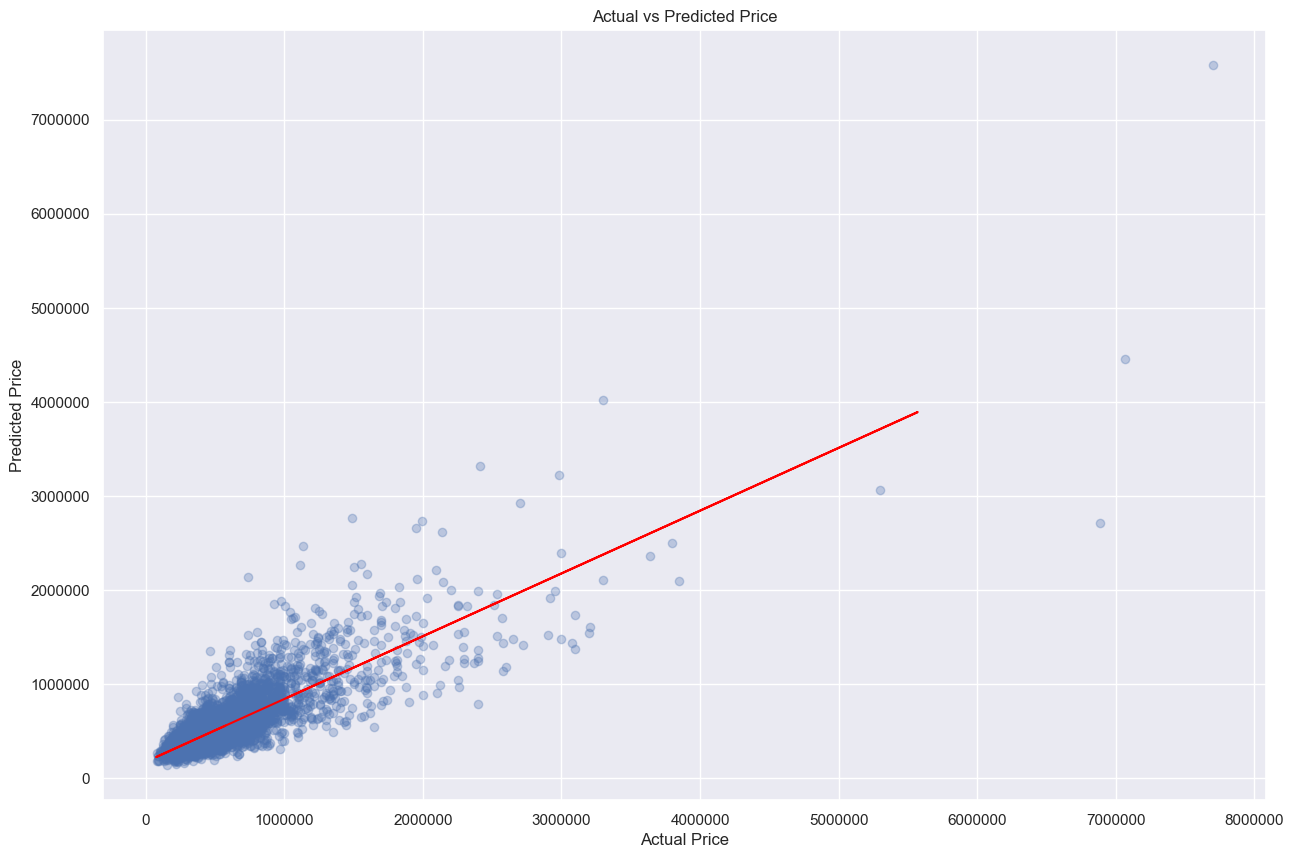

In [29]:
# scatterplot visualization of model
plt.figure(figsize=(15,10))
plt.scatter(x=y_test, y=y_pr1_pred, alpha=0.3)

# enter slope for fitted line
z = np.polyfit(y_test, y_pr1_pred, 1)
p = np.poly1d(z)

# plot
plt.plot(y_train, p(y_train), 'red')
plt.ylabel('Predicted Price')
plt.xlabel('Actual Price')
plt.title ('Actual vs Predicted Price')
plt.ticklabel_format(style='plain')

**<u>Result</u>:** The dispersion is somewhat low, signifying decent performance.

In [30]:
# create table with 7 columns (metrics) and 3 rows (model)
all_results = {
    'Model': ["Linear Regression (LR)", "LR-Polynomial Features", "Random Forrest"],
    'R2': [0.6069, 0.6875, 0.6217],
    'MSE': [61861527361.5375, 49171675943.0241, 59540412020.1137],
    'RMSE': [248719.7768, 221746.8736, 244009.0409],
    'MAE': [147206.5124, 137163.1917, 143943.5537],
    'MPE': [-7.7603, -9.7895, -9.6217],
    'MAPE': [29.7976, 27.4820, 28.3042]
}

# create dataframe
metrics = pd.DataFrame(all_results)
metrics

,Model,R2,MSE,RMSE,MAE,MPE,MAPE
0,Linear Regression (LR),0.6069,6.186153e+10,248719.7768,147206.5124,-7.7603,29.7976
1,LR-Polynomial Features,0.6875,4.917168e+10,221746.8736,137163.1917,-9.7895,27.4820
2,Random Forrest,0.6217,5.954041e+10,244009.0409,143943.5537,-9.6217,28.3042


## Model Results

**R-squared (R2):** The coefficient determination represents how well the model fits predicting the `price`. Therefore Linear Regression with polynomial combinations was the better performing model with 68.75% of the variation in dependent variable `price` is being explained by the exploratory variables `sqft_living`, `grade`, `bathrooms`, `bedrooms`, and `yr_built`.

**Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):** The MSE and RMSE were far from zero. The difference between actual and predicted values were extremely high, indicating that all models are imperfect.

**Mean Absolute Error (MAE):** The difference between the actual and predicted values on average for all models were in the hundred thousands. Considering the average price of homes are in the hundred thousands range, a high MAE could be expected.

**Mean Percentage Error (MPE):**  All the models' predictions are 7-9% lower, on average, than the actual values in terms of percentage error.

**Mean Absolute Percentage Error (MAPE):** On average, the all the models' predictions deviate from the actual values by around 30% in terms of percentage error.

## Property listings use cases for predicting housing prices:

`price` = 7.056e+06 + 175.7904 (sqft_living) + 1.375e+05 (grade) + 6.827e+04 (bathrooms) - 4.372e+04 (bedrooms) - 4011.8616 (yr_built) + 𝜀

By inputting `sqft_living`, `grade`, `bathrooms`, `bedrooms`, and `yr_built` values of a home of interest, we can suggest listing prices that can help buyers bid a competitive price as well as help sellers decide reasonable sale prices.

## Future Studies
Homebound Real Estate may consider other variables that can improve the supervised learning algorithms in order to predict better estimates.

## References
Python Reference Guide for IBM SPSS. Statistics.

Malin, J. (2020). Presentation 6.1: Linear Regression in a Marketing Use Case. Canvas@USD.

TDH. (2022, May 23) Interpretation of Evaluation Metrics For Regression Analysis. Train Data Hub.